In [793]:
import pandas as pd
import numpy as np


In [794]:
Train = pd.read_csv("C:\\Users\\Administrator\\Desktop\\Machine Learning\\datasets\\Assignment1_PGD B7\\Train.csv")
Test = pd.read_csv('C:\\Users\\Administrator\\Desktop\\Machine Learning\\datasets\\Assignment1_PGD B7\\Test.csv')

In [795]:
Train.head(2)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [796]:
Train.shape

(8523, 12)

In [797]:
Train.isnull().sum()   # checking the no. of null values in each coloumns

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [798]:
Train_copy = Train.copy()

In [799]:
Train_copy.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### unique values in categorical data & providing the consistency

In [800]:
# checking the uniques in categoricat data
Train_copy['Item_Fat_Content'].unique() 

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [801]:
# making the consistency to the data
Train_copy['Item_Fat_Content'] = Train_copy['Item_Fat_Content'].replace('low fat','Low Fat')
Train_copy['Item_Fat_Content'] = Train_copy['Item_Fat_Content'].replace('LF','Low Fat')
Train_copy['Item_Fat_Content'] = Train_copy['Item_Fat_Content'].replace('reg','Regular')


In [802]:
Train_copy['Item_Fat_Content'].unique()    # consistent

array(['Low Fat', 'Regular'], dtype=object)

In [803]:
Train_copy['Outlet_Size'].unique()      # consistent

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [804]:
Train_copy['Outlet_Location_Type'].unique()     # consistent

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [805]:
Train_copy['Outlet_Type'].unique()          # consistent

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [806]:
Train_copy['Item_Type'].unique() 

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

 ### Variable Analysis

In [807]:
Train_copy.dtypes  # variable analysis

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [808]:
# ordering the categorical values

from pandas.api.types import CategoricalDtype

Item_Fat_Content = CategoricalDtype(categories=['Regular','Low Fat'],ordered=True)
Train_copy['Item_Fat_Content'] = Train_copy['Item_Fat_Content'].astype(Item_Fat_Content)


Outlet_Size = CategoricalDtype(categories=['High','Medium','Small'],ordered=True)
Train_copy['Outlet_Size'] = Train_copy['Outlet_Size'].astype(Outlet_Size)

Outlet_Location_Type = CategoricalDtype(categories=['Tier 3','Tier 2','Tier 1'],ordered=True)
Train_copy['Outlet_Location_Type'] = Train_copy['Outlet_Location_Type'].astype(Outlet_Location_Type)

Outlet_Type = CategoricalDtype(categories=['Supermarket Type1','Supermarket Type3','Supermarket Type2','Grocery Store'],ordered=True)
Train_copy['Outlet_Type'] = Train_copy['Outlet_Type'].astype(Outlet_Type)

Item_Type = CategoricalDtype(categories=['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Meat','Soft Drinks','Breads','Hard Drinks','Starchy Foods','Others','Breakfast','Seafood'],ordered=True)
Train_copy['Item_Type'] = Train_copy['Item_Type'].astype('category')

Train_copy['Outlet_Establishment_Year'] = Train_copy['Outlet_Establishment_Year'].astype('float64')


In [809]:
Train_copy.pivot_table(index="Item_Type",values="Item_Outlet_Sales",aggfunc="sum").sort_values(by="Item_Outlet_Sales")

,Item_Outlet_Sales
Item_Type,
Seafood,1.488682e+05
Breakfast,2.322990e+05
Others,3.255176e+05
Starchy Foods,3.514013e+05
Hard Drinks,4.577934e+05
Breads,5.532372e+05
Soft Drinks,8.928977e+05
Meat,9.175656e+05
Health and Hygiene,1.045200e+06


In [810]:
Train_copy.dtypes  # after converting the dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year     float64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

### Missing value

In [811]:
Train_copy.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [812]:
# filling  the missing value

Train_copy['item_weight_fill_zero']=Train_copy['Item_Weight'].fillna(0)

new = Train_copy.groupby(['Outlet_Establishment_Year'])[['item_weight_fill_zero']].mean().reset_index()

# filling mean
import numpy as np
Train_copy['item_weight_fill_mean'] = Train_copy['Item_Weight'].fillna(round(np.mean(Train_copy['Item_Weight'])))
Train_copy_mean_fill_line=Train_copy.groupby(['Outlet_Establishment_Year'])['item_weight_fill_mean'].mean().reset_index()

# filling back fill

Train_copy['item_weight_fill_bfill'] = Train_copy['Item_Weight'].fillna(method='bfill')
Train_copy_back_fill_line=Train_copy.groupby(['Outlet_Establishment_Year'])['item_weight_fill_bfill'].mean().reset_index()


In [710]:
Train_copy['Item_weight_id_mean']=Train_copy['Item_Weight']
Train_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_weight_fill_zero,item_weight_fill_mean,item_weight_fill_bfill,Item_weight_id_mean
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300,9.300,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920,5.920,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500,17.500,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800,19.200,19.200,19.200,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930,8.930,8.930
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,556.6088,10.395,10.395,10.395,10.395
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987.0,High,Tier 3,Supermarket Type1,343.5528,13.650,13.650,13.650,13.650
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,4022.7636,0.000,13.000,16.200,NaN
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002.0,NaN,Tier 2,Supermarket Type1,1076.5986,16.200,16.200,16.200,16.200
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007.0,NaN,Tier 2,Supermarket Type1,4710.5350,19.200,19.200,19.200,19.200


## filling the missing value of Item_Weight as per the Item_Identifier

In [711]:

#filling the  mean values.

for i in list(Train_copy.groupby('Item_Identifier')):
    TN=i[1]
    rows=TN[np.isnan(TN['Item_weight_id_mean'])].index
    
    gm=i[1]['Item_weight_id_mean'].mean()
    Train_copy.loc[rows,'Item_weight_id_mean']=gm
# Code to impute NaN values in the Item_Weight column based on the means after grouping by the columns Item_Fat_Content
# and Item_Type

### filling the rest 4 null values by the mean as per Item_Fat_Content, Item_Type

In [712]:
# 
for i in list(Train_copy.groupby(['Item_Fat_Content','Item_Type'])):
    TN=i[1]
    rows=TN[np.isnan(TN['Item_weight_id_mean'])].index
    #print(rows)
    gm=i[1]['Item_weight_id_mean'].mean()
    Train_copy.loc[rows,'Item_weight_id_mean']=gm
# Code to impute NaN values in the Item_Weight column based on the means after grouping by the columns Item_Fat_Content
# and Item_Type

Train_copy_item_weight_id_mean = Train_copy.groupby(['Outlet_Establishment_Year'])['Item_weight_id_mean'].mean().reset_index()


### Ploting the graph for all the missing value Treatments

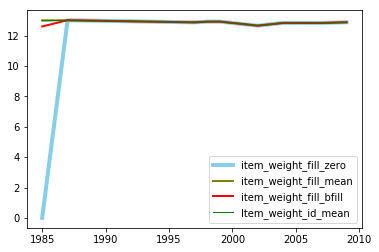

In [713]:
from matplotlib import pyplot as plt
plt.plot('Outlet_Establishment_Year','item_weight_fill_zero',data=new,color='skyblue',linewidth=4)
plt.plot('Outlet_Establishment_Year','item_weight_fill_mean',data=Train_copy_mean_fill_line,color='olive',linewidth=2)
plt.plot('Outlet_Establishment_Year','item_weight_fill_bfill',data=Train_copy_back_fill_line,color='r',linewidth=2)
plt.plot('Outlet_Establishment_Year','Item_weight_id_mean',data=Train_copy_item_weight_id_mean,color='g',linewidth=1)




plt.legend()
plt.show()

### Chossin the missng value treatment Item_weight_id_mean for the best imputation

In [714]:
from scipy.stats import mode

In [715]:
Train_copy

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,item_weight_fill_zero,item_weight_fill_mean,item_weight_fill_bfill,Item_weight_id_mean
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,9.300,9.300,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,5.920,5.920,5.920,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,17.500,17.500,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800,19.200,19.200,19.200,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,8.930,8.930,8.930,8.930
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,556.6088,10.395,10.395,10.395,10.395
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987.0,High,Tier 3,Supermarket Type1,343.5528,13.650,13.650,13.650,13.650
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,4022.7636,0.000,13.000,16.200,19.000
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002.0,NaN,Tier 2,Supermarket Type1,1076.5986,16.200,16.200,16.200,16.200
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007.0,NaN,Tier 2,Supermarket Type1,4710.5350,19.200,19.200,19.200,19.200


### Imputing the missing value  by mode of the Outlet size 

In [716]:
Train_copy.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x:x.mode()).reset_index().drop(columns={'level_1'}).set_index('Outlet_Type')

,Outlet_Size
Outlet_Type,
Supermarket Type1,Small
Supermarket Type3,Medium
Supermarket Type2,Medium
Grocery Store,Small


In [717]:
# filling the mode as per outlet_size

item_avg_outsize = Train_copy.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x:x.mode()).reset_index().drop(columns={'level_1'}).set_index('Outlet_Type')
miss_bool = Train_copy['Outlet_Size'].isnull() 
Train_copy.loc[miss_bool,'Outlet_Size'] = Train_copy.loc[miss_bool,'Outlet_Type'].apply(lambda x: item_avg_outsize.loc[x])

In [718]:
Train_copy.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
item_weight_fill_zero           0
item_weight_fill_mean           0
item_weight_fill_bfill          0
Item_weight_id_mean             0
dtype: int64

### Droping the coloumns of no use

In [719]:
Train_copy = Train_copy.drop(columns=['Item_Weight', 'item_weight_fill_zero','item_weight_fill_mean','item_weight_fill_bfill'])

### ploting the Box Plot for the Outliers

In [720]:
import seaborn as sb

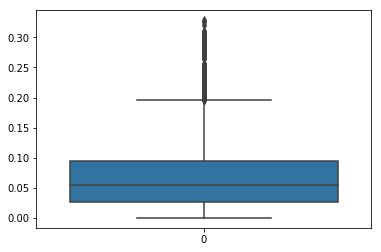

In [721]:
sb.boxplot(data=Train_copy["Item_Visibility"])     #visibility

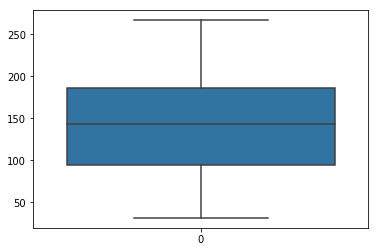

In [722]:
sb.boxplot(data=Train_copy["Item_MRP"])       #MRP

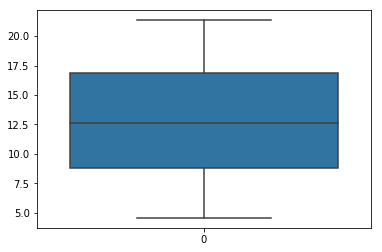

In [723]:
sb.boxplot(data=Train_copy["Item_weight_id_mean"])    # weight

In [724]:
Train_copy.dtypes

Item_Identifier                object
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year     float64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
Item_weight_id_mean           float64
dtype: object

#### checking Upon above Graphs found that the only coloumn has outlier is ( Item_Visibility )

In [725]:
Q1=np.quantile(Train_copy['Item_Visibility'],0.25)
Q3=np.quantile(Train_copy['Item_Visibility'],0.75)
IQR1=Q3-Q1
Ub=Q3+(1.5*IQR1)
lb=Q1-(1.5*IQR1)


Train_copy['Item_Visibility'] = Train_copy['Item_Visibility'].clip_upper(Ub)
Train_copy['Item_Visibility'] = Train_copy['Item_Visibility'].clip_lower(lb)


        


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  if __name__ == '__main__':


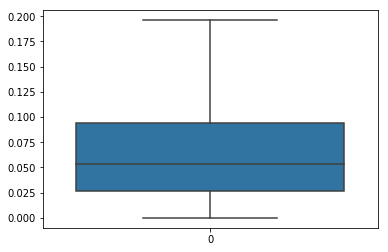

In [726]:
sb.boxplot(data=Train_copy["Item_Visibility"])    # outliers has been removed

# Encoding the data 

In [727]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()
Train_copy["Outlet_Size_L"]=x1.fit_transform(Train_copy["Outlet_Size"])
Train_copy["Outlet_Location_Type_L"]=x1.fit_transform(Train_copy["Outlet_Location_Type"])
Train_copy["Item_Fat_Content_L"]=x1.fit_transform(Train_copy["Item_Fat_Content"])
Train_copy["Outlet_Type_L"]=x1.fit_transform(Train_copy["Outlet_Type"])
Train_copy["Item_Type_L"]=x1.fit_transform(Train_copy["Item_Type"])
Train_copy.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_id_mean,Outlet_Size_L,Outlet_Location_Type_L,Item_Fat_Content_L,Outlet_Type_L,Item_Type_L
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,1,0,0,1,4
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,5.92,1,2,1,2,14
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,1,0,0,1,10
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Small,Tier 3,Grocery Store,732.3800,19.20,2,2,1,0,6
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,8.93,0,2,0,1,9


In [728]:
Train_copy.dtypes

Item_Identifier                object
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year     float64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
Item_weight_id_mean           float64
Outlet_Size_L                   int32
Outlet_Location_Type_L          int32
Item_Fat_Content_L              int32
Outlet_Type_L                   int32
Item_Type_L                     int32
dtype: object

In [729]:
Train_new=Train_copy.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type',])

In [730]:
Train_new.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_weight_id_mean,Outlet_Size_L,Outlet_Location_Type_L,Item_Fat_Content_L,Outlet_Type_L,Item_Type_L
0,0.016047,249.8092,1999.0,3735.1380,9.30,1,0,0,1,4
1,0.019278,48.2692,2009.0,443.4228,5.92,1,2,1,2,14
2,0.016760,141.6180,1999.0,2097.2700,17.50,1,0,0,1,10
3,0.000000,182.0950,1998.0,732.3800,19.20,2,2,1,0,6
4,0.000000,53.8614,1987.0,994.7052,8.93,0,2,0,1,9


### MinMax Scaler

In [731]:
from sklearn.preprocessing import MinMaxScaler
#creating object
mmsc=MinMaxScaler()
mmsc_data= mmsc.fit_transform(Train_new)
mmsc_data=pd.DataFrame(mmsc_data)
mmsc_data
mmsc_data.columns = Train_new.columns
mmsc_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_weight_id_mean,Outlet_Size_L,Outlet_Location_Type_L,Item_Fat_Content_L,Outlet_Type_L,Item_Type_L
0,0.081883,0.927507,0.583333,0.283587,0.282525,0.5,0.0,0.0,0.333333,0.266667
1,0.098369,0.072068,1.000000,0.031419,0.081274,0.5,1.0,1.0,0.666667,0.933333
2,0.085520,0.468288,0.583333,0.158115,0.770765,0.5,0.0,0.0,0.333333,0.666667
3,0.000000,0.640093,0.541667,0.053555,0.871986,1.0,1.0,1.0,0.000000,0.400000
4,0.000000,0.095805,0.083333,0.073651,0.260494,0.0,1.0,0.0,0.333333,0.600000


In [732]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

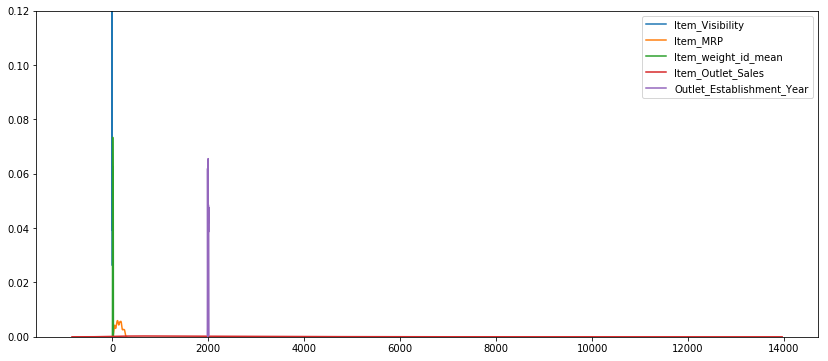

In [733]:
plt.figure(figsize=(14,6))
plt.ylim(0,0.12)
sb.kdeplot(Train_new['Item_Visibility'])
sb.kdeplot(Train_new['Item_MRP'])
sb.kdeplot(Train_new['Item_weight_id_mean'])
sb.kdeplot(Train_new['Item_Outlet_Sales'])
sb.kdeplot(Train_new['Outlet_Establishment_Year'])

### Model Initialisation    ( LinearRegression )  without normalisation

In [734]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [735]:
X=Train_new.drop('Item_Outlet_Sales',axis=1)
Y=Train_new['Item_Outlet_Sales']
Y=Y.values.reshape(len(Y),1)
Y.shape

(8523, 1)

In [760]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state =3)

reg=LinearRegression()
reg =reg.fit(x_train,y_train)

In [761]:
print(reg.coef_) 

[-2.45775495e-02  2.77985799e-01  3.36004294e-03  2.87478277e-03
 -2.02885228e-02 -4.65312712e-02  5.32915734e-03  2.17359593e-01
 -4.27016085e-05]


In [762]:
print(reg.intercept_)

-0.008754166563207683


In [763]:
y_pred = reg.predict(x_test)
y_error=y_test-y_pred


### RMSE

In [764]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.0900034547121598

### R-square

In [765]:
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)
print('Regression score is ',r2)

Regression score is  0.5364555551859427


Text(0.5, 1.0, 'Residual plot')

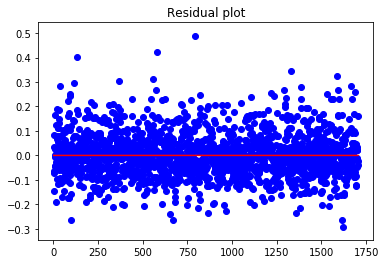

In [766]:
x = [i for i in range(1,len(y_pred)+1)]

x_plot = plt.scatter(x,(y_test-y_pred),c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title('Residual plot')

### Model Initialisation after MinMax Scaler

In [749]:
mmsc_data.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_weight_id_mean,Outlet_Size_L,Outlet_Location_Type_L,Item_Fat_Content_L,Outlet_Type_L,Item_Type_L
0,0.081883,0.927507,0.583333,0.283587,0.282525,0.5,0.0,0.0,0.333333,0.266667
1,0.098369,0.072068,1.000000,0.031419,0.081274,0.5,1.0,1.0,0.666667,0.933333
2,0.085520,0.468288,0.583333,0.158115,0.770765,0.5,0.0,0.0,0.333333,0.666667
3,0.000000,0.640093,0.541667,0.053555,0.871986,1.0,1.0,1.0,0.000000,0.400000
4,0.000000,0.095805,0.083333,0.073651,0.260494,0.0,1.0,0.0,0.333333,0.600000


In [750]:
X=mmsc_data.drop('Item_Outlet_Sales',axis=1)
Y=mmsc_data['Item_Outlet_Sales']

In [751]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

reg=LinearRegression()
reg =reg.fit(x_train,y_train)

In [752]:
print(reg.coef_) 

[-0.02697261  0.28158069  0.00230406 -0.0030599  -0.02343409 -0.0458709
  0.00515419  0.21455633  0.00036187]


In [753]:
print(reg.intercept_)

-0.002382717049229599


In [754]:
y_pred = reg.predict(x_test)
y_error=y_test-y_pred

In [755]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.08758444550123566

In [756]:
#R-Squared

from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)
print('Regression score is ',r2)

Regression score is  0.5190777410810041


Text(0.5, 1.0, 'Residual plot')

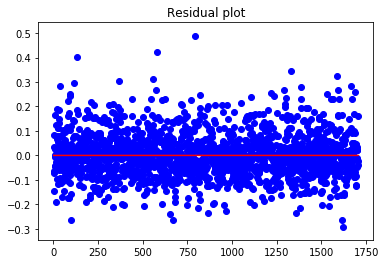

In [767]:
x = [i for i in range(1,len(y_pred)+1)]

x_plot = plt.scatter(x,(y_test-y_pred),c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title('Residual plot')

### Regularizaion

In [768]:
from sklearn.linear_model import Ridge, Lasso

In [769]:
predictors = x_train.columns
#predictiors

In [770]:
coef = pd.Series(reg.coef_,predictors).sort_values()
#coef

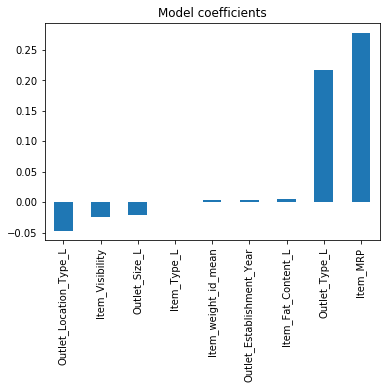

In [771]:
coef.plot(kind='bar',title="Model coefficients")

## Ridge Regression


In [774]:
ridgereg = Ridge(alpha=0.05)
ridgereg.fit(x_train,y_train)
pred=ridgereg.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)
print(rmse)
print(r2)

0.09000381216283798
0.5364518732249395


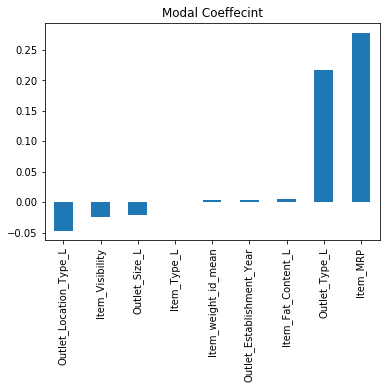

In [775]:
predictors =x_train.columns
coef = pd.Series(ridgereg.coef_,predictors).sort_values()
coef.plot(kind='bar',title="Modal Coeffecint")

## Lasso

In [778]:
lasoreg = Lasso(alpha=0.05)
lasoreg.fit(x_train,y_train)
pred=lasoreg.predict(x_test)
rmse= np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)
print(rmse)
print(r2)

0.13219508571284924
-8.38766277611036e-06


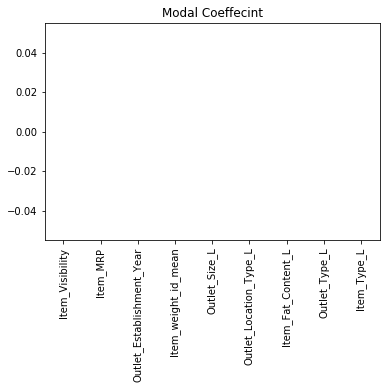

In [779]:
predictors =x_train.columns
coef = pd.Series(lasoreg.coef_,predictors).sort_values()
coef.plot(kind='bar',title="Modal Coeffecint")

## conclusion : 
##### We will choose the Linear Model without normalisation as the R-squared for both cases (i.e with or without Normalisation) is same  53.64 %


## Working on Test dataset

In [780]:
Test = pd.read_csv('C:\\Users\\Administrator\\Desktop\\Machine Learning\\datasets\\Assignment1_PGD B7\\Test.csv')

In [782]:
Test_copy = Test.copy()

In [784]:
Test_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [785]:
# making the consistency to the data
Test_copy['Item_Fat_Content'] = Test_copy['Item_Fat_Content'].replace('low fat','Low Fat')
Test_copy['Item_Fat_Content'] = Test_copy['Item_Fat_Content'].replace('LF','Low Fat')
Test_copy['Item_Fat_Content'] = Test_copy['Item_Fat_Content'].replace('reg','Regular')

In [791]:
# ordering the categorical values

from pandas.api.types import CategoricalDtype

Item_Fat_Content = CategoricalDtype(categories=['Regular','Low Fat'],ordered=True)
Test_copy['Item_Fat_Content'] = Test_copy['Item_Fat_Content'].astype(Item_Fat_Content)


Outlet_Size = CategoricalDtype(categories=['High','Medium','Small'],ordered=True)
Test_copy['Outlet_Size'] = Test_copy['Outlet_Size'].astype(Outlet_Size)

Outlet_Location_Type = CategoricalDtype(categories=['Tier 3','Tier 2','Tier 1'],ordered=True)
Test_copy['Outlet_Location_Type'] = Test_copy['Outlet_Location_Type'].astype(Outlet_Location_Type)

Outlet_Type = CategoricalDtype(categories=['Supermarket Type1','Supermarket Type3','Supermarket Type2','Grocery Store'],ordered=True)
Test_copy['Outlet_Type'] = Test_copy['Outlet_Type'].astype(Outlet_Type)

Item_Type = CategoricalDtype(categories=['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Meat','Soft Drinks','Breads','Hard Drinks','Starchy Foods','Others','Breakfast','Seafood'],ordered=True)
Test_copy['Item_Type'] = Test_copy['Item_Type'].astype('category')

Test_copy['Outlet_Establishment_Year'] = Test_copy['Outlet_Establishment_Year'].astype('float64')


In [813]:
# filling  the missing value

Test_copy['item_weight_fill_zero']=Test_copy['Item_Weight'].fillna(0)

new = Test_copy.groupby(['Outlet_Establishment_Year'])[['item_weight_fill_zero']].mean().reset_index()

# filling mean
import numpy as np
Test_copy['item_weight_fill_mean'] = Test_copy['Item_Weight'].fillna(round(np.mean(Train_copy['Item_Weight'])))
Test_copy_mean_fill_line=Test_copy.groupby(['Outlet_Establishment_Year'])['item_weight_fill_mean'].mean().reset_index()

# filling back fill

Test_copy['item_weight_fill_bfill'] = Test_copy['Item_Weight'].fillna(method='bfill')
Test_copy_back_fill_line=Train_copy.groupby(['Outlet_Establishment_Year'])['item_weight_fill_bfill'].mean().reset_index()


In [814]:
Test_copy['Item_weight_id_mean']=Train_copy['Item_Weight']

In [815]:

#filling the  mean values.

for i in list(Test_copy.groupby('Item_Identifier')):
    TN=i[1]
    rows=TN[np.isnan(TN['Item_weight_id_mean'])].index
    
    gm=i[1]['Item_weight_id_mean'].mean()
    Test_copy.loc[rows,'Item_weight_id_mean']=gm

In [816]:
# 
for i in list(Test_copy.groupby(['Item_Fat_Content','Item_Type'])):
    TN=i[1]
    rows=TN[np.isnan(TN['Item_weight_id_mean'])].index
    
    gm=i[1]['Item_weight_id_mean'].mean()
    Test_copy.loc[rows,'Item_weight_id_mean']=gm
# Code to impute NaN values in the Item_Weight column based on the means after grouping by the columns Item_Fat_Content
# and Item_Type

Test_copy_item_weight_id_mean = Test_copy.groupby(['Outlet_Establishment_Year'])['Item_weight_id_mean'].mean().reset_index()


In [817]:
# filling the mode as per outlet_size

item_avg_outsize = Test_copy.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x:x.mode()).reset_index().drop(columns={'level_1'}).set_index('Outlet_Type')
miss_bool = Test_copy['Outlet_Size'].isnull() 
Test_copy.loc[miss_bool,'Outlet_Size'] = Test_copy.loc[miss_bool,'Outlet_Type'].apply(lambda x: item_avg_outsize.loc[x])

In [818]:
#droping the unwated coloumn
Test_copy = Test_copy.drop(columns=['Item_Weight', 'item_weight_fill_zero','item_weight_fill_mean','item_weight_fill_bfill'])

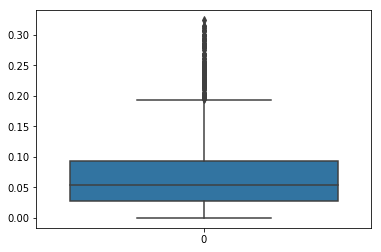

In [819]:
#outliers
sb.boxplot(data=Test_copy["Item_Visibility"])     #visibility

In [820]:
#Treating the outliers

Q1=np.quantile(Train_copy['Item_Visibility'],0.25)
Q3=np.quantile(Train_copy['Item_Visibility'],0.75)
IQR1=Q3-Q1
Ub=Q3+(1.5*IQR1)
lb=Q1-(1.5*IQR1)


Test_copy['Item_Visibility'] = Test_copy['Item_Visibility'].clip_upper(Ub)
Test_copy['Item_Visibility'] = Test_copy['Item_Visibility'].clip_lower(lb)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  # This is added back by InteractiveShellApp.init_path()


In [821]:
# apply encoding 

from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()
Test_copy["Outlet_Size_L"]=x1.fit_transform(Test_copy["Outlet_Size"])
Test_copy["Outlet_Location_Type_L"]=x1.fit_transform(Test_copy["Outlet_Location_Type"])
Test_copy["Item_Fat_Content_L"]=x1.fit_transform(Test_copy["Item_Fat_Content"])
Test_copy["Outlet_Type_L"]=x1.fit_transform(Test_copy["Outlet_Type"])
Test_copy["Item_Type_L"]=x1.fit_transform(Test_copy["Item_Type"])
Test_copy.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_weight_id_mean,Outlet_Size_L,Outlet_Location_Type_L,Item_Fat_Content_L,Outlet_Type_L,Item_Type_L
0,FDW58,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,9.30,1,0,0,1,13
1,FDW14,Regular,0.038428,Dairy,87.3198,OUT017,2007.0,Small,Tier 2,Supermarket Type1,5.92,2,1,1,1,4
2,NCN55,Low Fat,0.099575,Others,241.7538,OUT010,1998.0,Small,Tier 3,Grocery Store,17.50,2,2,0,0,11
3,FDQ58,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007.0,Small,Tier 2,Supermarket Type1,19.20,2,1,0,1,13
4,FDY38,Regular,0.118599,Dairy,234.2300,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,8.93,1,2,1,3,4


In [822]:
# droping the unwanted coloumn
Test_new=Test_copy.drop(columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type',])

In [824]:
Test_new.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_weight_id_mean,Outlet_Size_L,Outlet_Location_Type_L,Item_Fat_Content_L,Outlet_Type_L,Item_Type_L
0,0.007565,107.8622,1999.0,9.30,1,0,0,1,13
1,0.038428,87.3198,2007.0,5.92,2,1,1,1,4
2,0.099575,241.7538,1998.0,17.50,2,2,0,0,11
3,0.015388,155.0340,2007.0,19.20,2,1,0,1,13
4,0.118599,234.2300,1985.0,8.93,1,2,1,3,4


### Model Initialisation    ( LinearRegression )  without normalisation


In [827]:
X=Train_new.drop('Item_Outlet_Sales',axis=1)
Y=Train_new['Item_Outlet_Sales']
Y=Y.values.reshape(len(Y),1)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state =3)

reg=LinearRegression()
reg =reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_pred)
print('Regression score is ',r2)

Regression score is  0.5364555551859429


In [831]:
Test_final=Test_new.copy()

In [832]:
Test_final['Item_Outlet_Sales'] = reg.predict(Test_new)

In [834]:
Test_final.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_weight_id_mean,Outlet_Size_L,Outlet_Location_Type_L,Item_Fat_Content_L,Outlet_Type_L,Item_Type_L,Item_Outlet_Sales
0,0.007565,107.8622,1999.0,9.30,1,0,0,1,13,1935.078291
1,0.038428,87.3198,2007.0,5.92,2,1,1,1,4,1209.001608
2,0.099575,241.7538,1998.0,17.50,2,2,0,0,11,2177.644180
3,0.015388,155.0340,2007.0,19.20,2,1,0,1,13,2249.439522
4,0.118599,234.2300,1985.0,8.93,1,2,1,3,4,5027.297011


## Conclusion :
####   The coloumn name ( Item_Outlet_Sales ) is the predicetd values for the Test data provided .
####   with 53.64 % of R-Squared value.